# Upwork capstone project
This project will aim to enhance Upwork's job searching capabilities by generating likely job titles and descriptions, necessary skills and likely competition given what type of trending job's are detected. This will be done by developing a machine learning model based on the available dataset, provided by Kaggle user Ahmed Myalo: https://www.kaggle.com/datasets/ahmedmyalo/upwork-freelance-jobs-60k?select=Final_Upwork_Dataset.csv

In this notebook, we will explore the dataset and perform a high-level first pass at the data.

The features I'm particularly interested on are (as written by Ahmed on the Kaggle post):

    - Job Title: Specifies the nature of the job. It aids potential applicants in quickly understanding the role that client needs.
    - EX_level_demand: Describes the skill tier desired. Helps candidates evaluate if they are a fit for the job. (there's 3 tiers on the site: "Entry level & Intermediate & Expert")
    - Description: the full description of the job which client wrote.
    - Category_1 to Category_9: These columns specify categories of skills that the client wrote as relevant to the job. Each category column is paired with a corresponding URL ("CategoryX_URL_search") which leads to a search page for requiring the specified skill.
    - Search_Keyword: the keyword I've used in the search bar to get that row result. I've used (3D & Data science & Developer & Marketing) but I didn't scrap these fields with the same quantity.
    - Applicants_Num: number of the freelancers who have applied for that job yet. A high number might deter someone from applying.
    - Highlight: it's an indicator about this job.
    - Job_Cost: it's for "Fixed-price" projects; The projected budget can help freelancers gauge the project's scale and value.
    - Connects_Num: connects are the currency of the site; the freelancers buy every 10 connects for 1.5$ . so the more job costs the less freelancers applying for it.



The current scope of the project aims to extract key skills and requirements from the job descriptions in order to better understand the most in-demand skills in different sectors, allowing freelancers to focus on the development of those skills.


Since the dataset also contains the how much each applicant offers for the employer to push their offer up the ranks of visibility - Upwork names this currency "connects" - I would be able to examine job popularity and competition, to see what jobs are chased and what niches are oversaturated or otherwise.


In the end, the project aims to provide various insights, being able to guide the freelancer into what sort of job is typical, what title and description it tends to have, what skills are typically required, and the amount they can be expected to be paid. It would also produce examples of atypical jobs and jobs other members of Upwork aren't applying for, to allow the freelancer to seek out potential niches.


In [95]:
# initial library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# read in the data and store it in a pandas dataframe
df = pd.read_csv("Final_Upwork_Dataset.csv")

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63950 entries, 0 to 63949
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             63948 non-null  object 
 1   Job_URL               63949 non-null  object 
 2   EX_level_demand       56935 non-null  object 
 3   Time_Limitation       23034 non-null  object 
 4   Search_Keyword        63949 non-null  object 
 5   Posted_from           63913 non-null  object 
 6   Description           63948 non-null  object 
 7   Category1_URL_search  63505 non-null  object 
 8   Category_1            63505 non-null  object 
 9   highlight             50131 non-null  object 
 10  Category2_URL_search  59889 non-null  object 
 11  Category_2            59889 non-null  object 
 12  Category3_URL_search  54997 non-null  object 
 13  Category_3            54997 non-null  object 
 14  Category4_URL_search  47543 non-null  object 
 15  Category_4         

Great, we have a dataset with more than 60,000 entries and a total of 41 columns.

Let's see this data for the first time.

In [98]:
df.head()

,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,...,Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate
0,Power bi specialist freelance,https://www.upwork.com/jobs/Power-specialist-f...,Expert,NaN,Data_science,5 minutes ago,Already data pooled and designed. Need to refi...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,data,...,United States,6.0,12.0,NaN,0.0,Fixed-price,"$2,500",NaN,0,NaN
1,Case Study (on-demand delivery startup),https://www.upwork.com/jobs/Case-Study-demand-...,Intermediate,NaN,Data_science,5 minutes ago,"Hi,\n\nWould you be able to help me do a case-...",https://www.upwork.com/nx/jobs/search/?ontolog...,Google Data Studio,Google Data Studio,...,Canada,4.0,8.0,5.000000,1.0,Fixed-price,$200,NaN,0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",https://www.upwork.com/jobs/File-Maker-Pro-Rep...,Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,https://www.upwork.com/nx/jobs/search/?ontolog...,Report Writing,NaN,...,United States,6.0,12.0,5.000000,1.0,Hourly,NaN,$40.00,40,NaN
3,Implementation of EleutherAI/gpt-neox-20b,https://www.upwork.com/jobs/Implementation-Ele...,Expert,"3 to 6 months, Less than 30 hrs/week",Data_science,12 minutes ago,"As a first step, you will implement the instal...",https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning Model,NaN,...,Canada,6.0,12.0,4.935536,26.0,Hourly,NaN,$35.00-$100.00,$35.00,$100.00
4,BI and Data Engineer for Upwork Finance System...,https://www.upwork.com/jobs/and-span-Data-span...,Expert,"More than 6 months, 30+ hrs/week",Data_science,14 minutes ago,The Upwork Finance Systems team is looking for...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,Data,...,United States,6.0,12.0,4.942242,12512.0,Hourly,NaN,NaN,0,NaN


We can see that many columns include URL's linking to the job posting. Right off the bat, I can tell that these will be removed since they provide no use.

Now, let's see what a typical single entry looks like:

In [99]:
df.iloc[0]

Job Title                                   Power bi specialist freelance
Job_URL                 https://www.upwork.com/jobs/Power-specialist-f...
EX_level_demand                                                    Expert
Time_Limitation                                                       NaN
Search_Keyword                                               Data_science
Posted_from                                                 5 minutes ago
Description             Already data pooled and designed. Need to refi...
Category1_URL_search    https://www.upwork.com/nx/jobs/search/?ontolog...
Category_1                                                  Data Analysis
highlight                                                            data
Category2_URL_search    https://www.upwork.com/nx/jobs/search/?ontolog...
Category_2                                             Data Visualization
Category3_URL_search    https://www.upwork.com/nx/jobs/search/?ontolog...
Category_3                            

We can see what properties an entry has. For my purposes, the job titles, descriptions and categories will be the most useful, but numerical information such as Job_cost and Connects_num will result in a richer model.

That being said, let's get started by turning the Job_cost into a more useable format.

In [115]:
# let's replace the dollar sign and comma in the Job_Cost column and convert it to float for later processing and modelling   
df["Job_Cost"] = df["Job_Cost"].str.replace('$','').str.replace(',','').astype(float)

Let's also single out the column names for future reference:

In [116]:
df.columns

Index(['Job Title', 'Job_URL', 'EX_level_demand', 'Time_Limitation',
       'Search_Keyword', 'Posted_from', 'Description', 'Category1_URL_search',
       'Category_1', 'highlight', 'Category2_URL_search', 'Category_2',
       'Category3_URL_search', 'Category_3', 'Category4_URL_search',
       'Category_4', 'Category5_URL_search', 'Category_5',
       'Category6_URL_search', 'Category_6', 'Category7_URL_search',
       'Category_7', 'Category8_URL_search', 'Category_8',
       'Category9_URL_search', 'Category_9', 'Applicants_Num',
       'Payment_Situation', 'Enterprise_Client', 'Freelancers_Num', 'Spent($)',
       'Client_Country', 'Connects_Num', 'New_Connects_Num', 'Rating',
       'Feedback_Num', 'Payment_type', 'Job_Cost', 'Hourly_Rate', 'Start_rate',
       'End_rate'],
      dtype='object')

Now, the moment of truth. Let's see how this dataset holds up in terms of how many missing values there are:

In [117]:
df.isna().sum().sort_values(ascending=False) # view how many missing values are in each column and sort them in descending order

Enterprise_Client       63897
Category_9              47469
Category9_URL_search    47469
Job_Cost                43837
Category_8              43514
Category8_URL_search    43514
Time_Limitation         40916
Category7_URL_search    38758
Category_7              38758
End_rate                37987
Hourly_Rate             37380
Rating                  33357
Category_6              32643
Category6_URL_search    32643
Category5_URL_search    24372
Category_5              24372
Category4_URL_search    16407
Category_4              16407
highlight               13819
Category3_URL_search     8953
Category_3               8953
EX_level_demand          7015
Category_2               4061
Category2_URL_search     4061
Spent($)                 1646
Category1_URL_search      445
Category_1                445
Client_Country            125
Posted_from                37
Description                 2
Job Title                   2
Search_Keyword              1
Payment_Situation           1
Connects_N

This doesn't look great so far. Let's get a clearer picture of just how big this proportion is:

In [118]:
dfna = df.isna().sum()/len(df)           # view the percentage of missing values in each column
dfna.sort_values(ascending=False).head() # sort the columns by the percentage of missing values

Enterprise_Client       0.999171
Category_9              0.742283
Category9_URL_search    0.742283
Job_Cost                0.685489
Category_8              0.680438
dtype: float64

In [119]:
dfna[dfna > 0.3].info() # view how many columns have more than 30% missing values

<class 'pandas.core.series.Series'>
Index: 16 entries, Time_Limitation to End_rate
Series name: None
Non-Null Count  Dtype  
--------------  -----  
16 non-null     float64
dtypes: float64(1)
memory usage: 256.0+ bytes


Alright, so we are left with 16 columns where more than 30% of the data is missing. Sadly, Job_cost is heavily compromised, and it seems to me that this dataset won't allow the creation of a model which predicts job cost. 

Let's start hacking up the dataset to see if these missing values affect this dataset's utility in terms of text generation.

In [120]:
filtered_df = df[df.columns[~df.columns.str.contains('URL')]]   # remove columns with URL in the 
                                                                # name, since they are irrelevant to my EDA and model

In [121]:
filtered_df # view our progress so far

,Job Title,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category_1,highlight,Category_2,Category_3,...,Client_Country,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate
0,Power bi specialist freelance,Expert,NaN,Data_science,5 minutes ago,Already data pooled and designed. Need to refi...,Data Analysis,data,Data Visualization,Microsoft Power BI,...,United States,6.0,12.0,NaN,0.0,Fixed-price,2500.0,NaN,0,NaN
1,Case Study (on-demand delivery startup),Intermediate,NaN,Data_science,5 minutes ago,"Hi,\n\nWould you be able to help me do a case-...",Google Data Studio,Google Data Studio,SQL,Tableau,...,Canada,4.0,8.0,5.000000,1.0,Fixed-price,200.0,NaN,0,NaN
2,"File Maker Pro Reports, Charts, Query and Ongo...",Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,Report Writing,NaN,Custom Graphics,NaN,...,United States,6.0,12.0,5.000000,1.0,Hourly,NaN,$40.00,40,NaN
3,Implementation of EleutherAI/gpt-neox-20b,Expert,"3 to 6 months, Less than 30 hrs/week",Data_science,12 minutes ago,"As a first step, you will implement the instal...",Machine Learning Model,NaN,Machine Learning,Python,...,Canada,6.0,12.0,4.935536,26.0,Hourly,NaN,$35.00-$100.00,$35.00,$100.00
4,BI and Data Engineer for Upwork Finance System...,Expert,"More than 6 months, 30+ hrs/week",Data_science,14 minutes ago,The Upwork Finance Systems team is looking for...,Data Analysis,Data,Looker,SQL,...,United States,6.0,12.0,4.942242,12512.0,Hourly,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63945,(Commission Based) Cold Caller Needed,Expert,"More than 6 months, 30+ hrs/week",Marketing,3 days ago,About the role:\n\nWe are seeking a motivated ...,Cold Calling,Marketing,Outbound Sales,Communications,...,Singapore,4.0,8.0,4.756932,29.0,Hourly,NaN,NaN,0,NaN
63946,High-Performance *Ecom Email* Copywriter Suppl...,Expert,"More than 6 months, 30+ hrs/week",Marketing,3 days ago,We are seeking a talented and motivated Copywr...,Email Copywriting,Marketing,Copywriting,Ad Copy,...,United States,6.0,12.0,4.666868,42.0,Hourly,NaN,NaN,0,NaN
63947,TikTok profile managment Hungary,Entry level,"1 to 3 months, Less than 30 hrs/week",Marketing,3 days ago,We are searching for someone who could help us...,Social Media Marketing,Social Media Marketing,TikTok Marketing,TikTok,...,Slovenia,6.0,12.0,NaN,0.0,Hourly,NaN,NaN,0,NaN
63948,Creating videos (including UGC) for TikTok - A...,Intermediate,NaN,Marketing,3 days ago,"Hello there,\nWe are interested in creating so...",Social Media Marketing,Social Media Marketing,Video Editing,TikTok Ad,...,Israel,4.0,8.0,4.979751,113.0,Fixed-price,NaN,NaN,0,NaN


Alright, so we have removed 10 columns just by filtering out the columns which purpose was to view the job's URL.

Let's go further by seeing how much null values affect the columns which aren't numerical for the purpose of text generation.

In [173]:
# keep only categorical columns that will aid in text generation
textdf = filtered_df[["Job Title", "Description" ,"Category_1", "Category_2", "Category_3", "highlight", "Connects_Num", "EX_level_demand", "Client_Country", "Applicants_Num"]]

Now we want to see which fields have useful values out of those leftover columns

In [174]:
# keep only those rows that have all the desired values
textdf = textdf[(textdf["Description"].notna()) &(textdf["highlight"].notna()) 
                &(textdf["Category_1"].notna()) & (textdf["Category_2"].notna()) 
                & (textdf["Category_3"].notna()) & (textdf["Connects_Num"].notna()) & (textdf["EX_level_demand"].notna()) & (textdf["Client_Country"].notna()) & (textdf["Applicants_Num"].notna())]

In [176]:
textdf.head()

,Job Title,Description,Category_1,Category_2,Category_3,highlight,Connects_Num,EX_level_demand,Client_Country,Applicants_Num
0,Power bi specialist freelance,Already data pooled and designed. Need to refi...,Data Analysis,Data Visualization,Microsoft Power BI,data,6.0,Expert,United States,Less than 5
1,Case Study (on-demand delivery startup),"Hi,\n\nWould you be able to help me do a case-...",Google Data Studio,SQL,Tableau,Google Data Studio,4.0,Intermediate,Canada,Less than 5
4,BI and Data Engineer for Upwork Finance System...,The Upwork Finance Systems team is looking for...,Data Analysis,Looker,SQL,Data,6.0,Expert,United States,Less than 5
5,Computer vision / machine learning: synthetic ...,Our company is working on a government proposa...,Generative Adversarial Network,Machine Learning,Computer Vision,data,6.0,Expert,United States,Less than 5
6,Expert in Data Analytics,Mission : Ensure smooth transition of Analytic...,Data Visualization,Data Analysis,Microsoft Power BI,Data,6.0,Expert,United States,Less than 5


In [177]:
textdf.head()

,Job Title,Description,Category_1,Category_2,Category_3,highlight,Connects_Num,EX_level_demand,Client_Country,Applicants_Num
0,Power bi specialist freelance,Already data pooled and designed. Need to refi...,Data Analysis,Data Visualization,Microsoft Power BI,data,6.0,Expert,United States,Less than 5
1,Case Study (on-demand delivery startup),"Hi,\n\nWould you be able to help me do a case-...",Google Data Studio,SQL,Tableau,Google Data Studio,4.0,Intermediate,Canada,Less than 5
4,BI and Data Engineer for Upwork Finance System...,The Upwork Finance Systems team is looking for...,Data Analysis,Looker,SQL,Data,6.0,Expert,United States,Less than 5
5,Computer vision / machine learning: synthetic ...,Our company is working on a government proposa...,Generative Adversarial Network,Machine Learning,Computer Vision,data,6.0,Expert,United States,Less than 5
6,Expert in Data Analytics,Mission : Ensure smooth transition of Analytic...,Data Visualization,Data Analysis,Microsoft Power BI,Data,6.0,Expert,United States,Less than 5


This looks pretty good, the top entries in this new dataframe seem to have job titles, descriptions, categories, highlights, client's country, competition and connect numbers. Let's reset the index to keep things clean:

In [178]:
textdf = textdf.reset_index(drop=True)

In [179]:
textdf.head()

,Job Title,Description,Category_1,Category_2,Category_3,highlight,Connects_Num,EX_level_demand,Client_Country,Applicants_Num
0,Power bi specialist freelance,Already data pooled and designed. Need to refi...,Data Analysis,Data Visualization,Microsoft Power BI,data,6.0,Expert,United States,Less than 5
1,Case Study (on-demand delivery startup),"Hi,\n\nWould you be able to help me do a case-...",Google Data Studio,SQL,Tableau,Google Data Studio,4.0,Intermediate,Canada,Less than 5
2,BI and Data Engineer for Upwork Finance System...,The Upwork Finance Systems team is looking for...,Data Analysis,Looker,SQL,Data,6.0,Expert,United States,Less than 5
3,Computer vision / machine learning: synthetic ...,Our company is working on a government proposa...,Generative Adversarial Network,Machine Learning,Computer Vision,data,6.0,Expert,United States,Less than 5
4,Expert in Data Analytics,Mission : Ensure smooth transition of Analytic...,Data Visualization,Data Analysis,Microsoft Power BI,Data,6.0,Expert,United States,Less than 5


In [195]:
textdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40223 entries, 0 to 40222
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        40223 non-null  object 
 1   Description      40223 non-null  object 
 2   Category_1       40223 non-null  object 
 3   Category_2       40223 non-null  object 
 4   Category_3       40223 non-null  object 
 5   highlight        40223 non-null  object 
 6   Connects_Num     40223 non-null  float64
 7   EX_level_demand  40223 non-null  object 
 8   Client_Country   40223 non-null  object 
 9   Applicants_Num   40223 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.1+ MB


Beautiful! So far we have more than 40,000 useable rows to train an NLP model in the future. 

Let's conduct some preliminary EDA to see that this new dataframe offers. 

As a reminder, recruiters list skills in order of importance for their job post. For now, I'll consider Category_1 as Vital, Category_2 as Useful, and Category_3 as Supplementary.

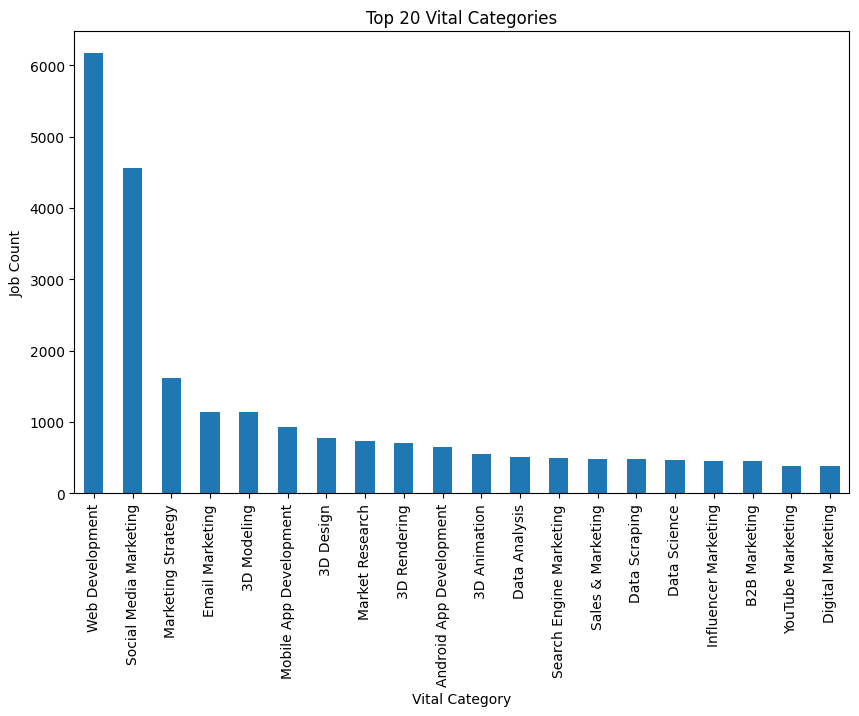

In [192]:
plt.figure(figsize=(10, 6))
textdf["Category_1"].value_counts().head(20).plot(kind="bar")
plt.xlabel('Vital Category')
plt.ylabel('Job Count')
plt.title('Top 20 Vital Categories')
plt.show()


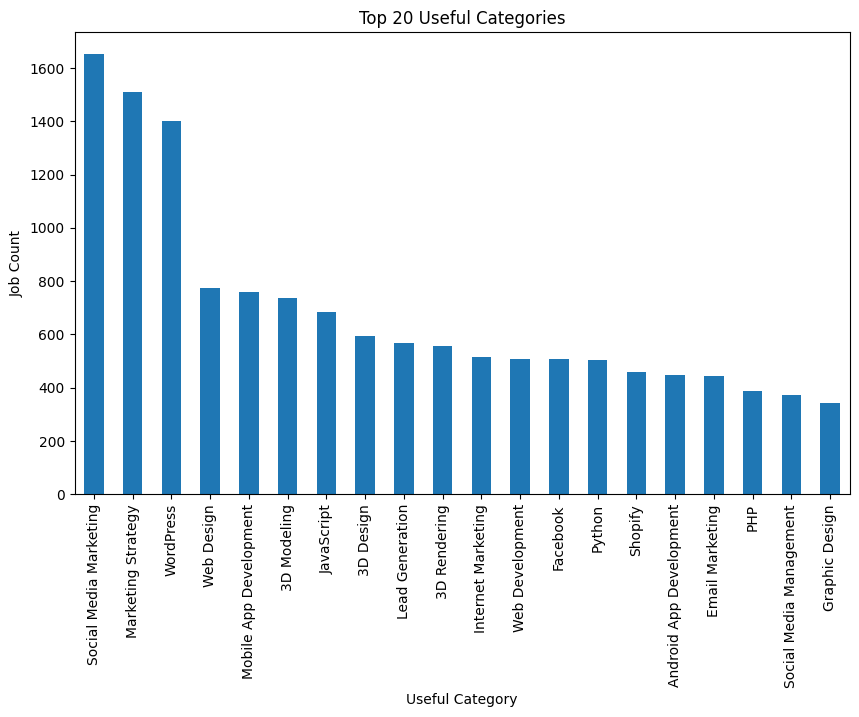

In [193]:
plt.figure(figsize=(10, 6))
textdf["Category_2"].value_counts().head(20).plot(kind="bar")
plt.xlabel('Useful Category')
plt.ylabel('Job Count')
plt.title('Top 20 Useful Categories')
plt.show()


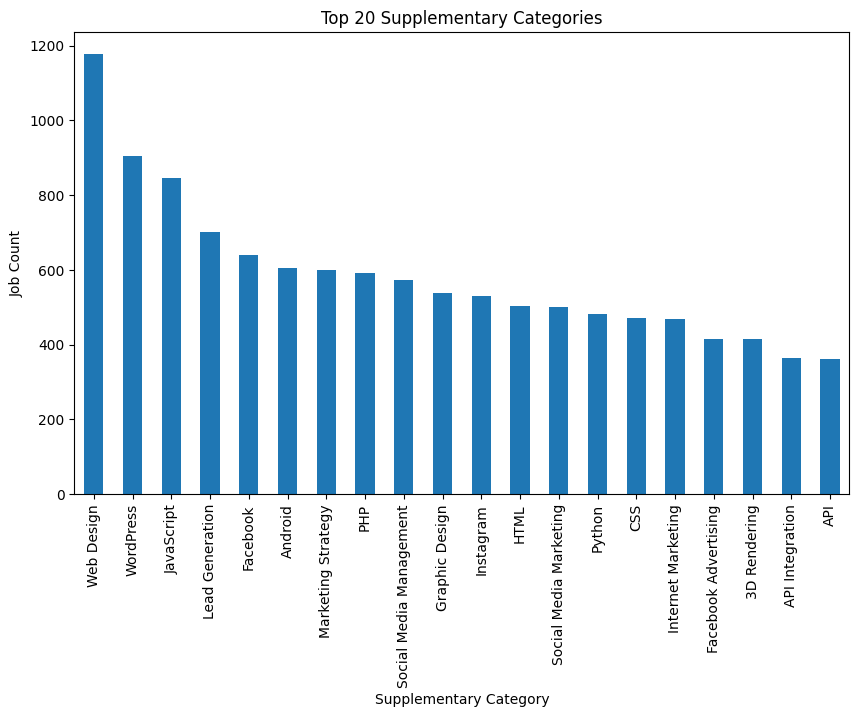

In [194]:
plt.figure(figsize=(10, 6))
textdf["Category_3"].value_counts().head(20).plot(kind="bar")
plt.xlabel('Supplementary Category')
plt.ylabel('Job Count')
plt.title('Top 20 Supplementary Categories')
plt.show()


A quick analysis makes it seem that this dataframe's most popular skills revolve around web development and design, Wordpress and Marketing strategies.

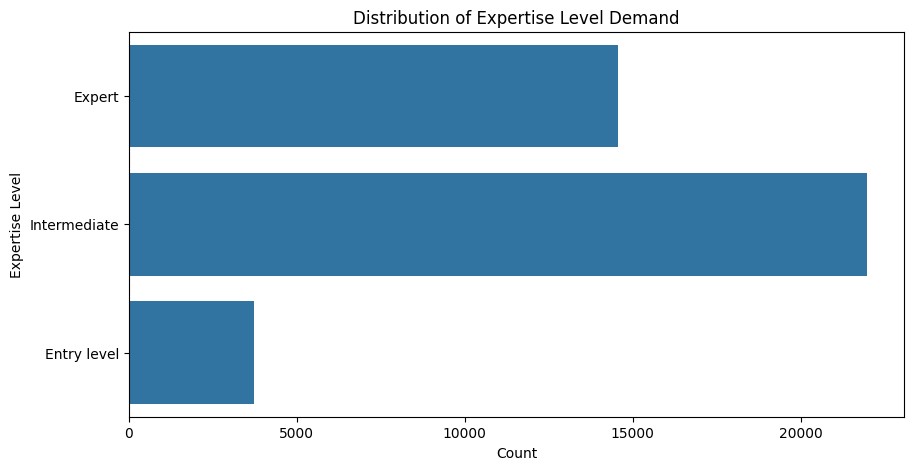

In [184]:
#  view the distribution of expertise level demand in the whole dataset
plt.figure(figsize=(10, 5))
sns.countplot(y=textdf['EX_level_demand'])
plt.title('Distribution of Expertise Level Demand')
plt.xlabel('Count')
plt.ylabel('Expertise Level')
plt.show()

We can see that relatively few jobs are entry level, whereas most jobs are require an intermediate level of expertise.

Let us see how many connects tend to be required per job.

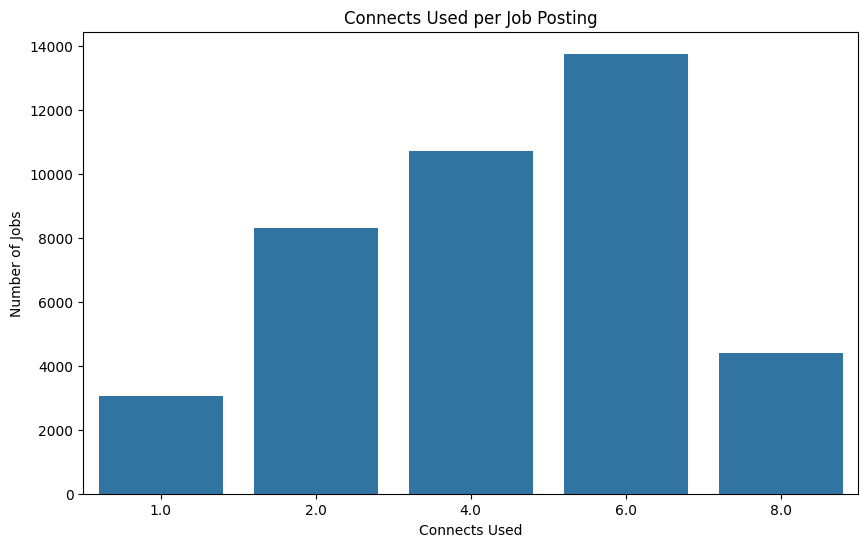

In [185]:
# view number of connects used per job posting
plt.figure(figsize=(10, 6))
sns.barplot(x=textdf['Connects_Num'].value_counts().index, y=textdf['Connects_Num'].value_counts().values)
plt.title('Connects Used per Job Posting')
plt.xlabel('Connects Used')
plt.ylabel('Number of Jobs')
plt.show()

Let us also see how the recruiters countries are distribuited.

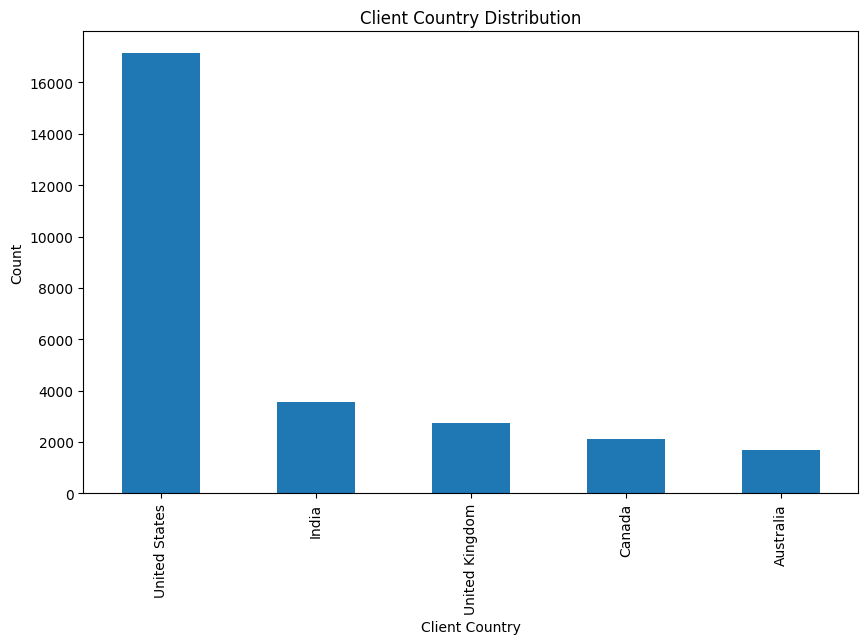

In [186]:
plt.figure(figsize=(10, 6))
textdf['Client_Country'].value_counts().head().plot(kind='bar')
plt.title('Client Country Distribution')
plt.xlabel('Client Country')
plt.ylabel('Count')
plt.show()


Most clients come from the US, which could serve as an indication of the client's timezones and cultural sensibilities.

Finally, lets see how many people tend to apply to each job:

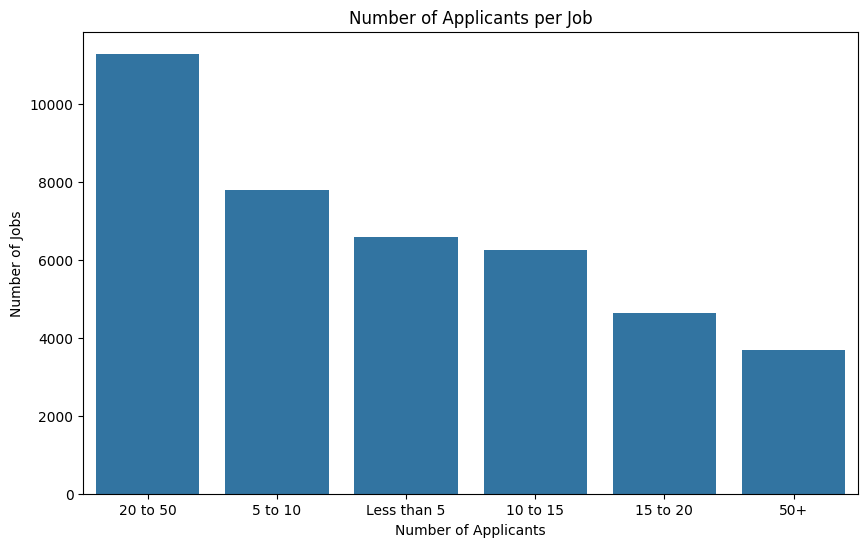

In [187]:
plt.figure(figsize=(10, 6))
sns.barplot(x=textdf['Applicants_Num'].value_counts().index, y=textdf['Applicants_Num'].value_counts().values)
plt.title('Number of Applicants per Job')
plt.xlabel('Number of Applicants')
plt.ylabel('Number of Jobs')
plt.show()

Perhaps it would be useful to view how many people chase which types of jobs more.

Later progress will focus on transforming chunks of text like the job titles and descriptions into useable formats for the NLP model, considering if it's sensible to impute missing data such as job_cost